In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('spam.csv',encoding='latin1')
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [4]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
mail_data=data.where((pd.notnull(data)),'')

In [6]:
mail_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
mail_data.shape

(5572, 2)

In [8]:
mail_data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
mail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

<AxesSubplot:xlabel='v1', ylabel='count'>

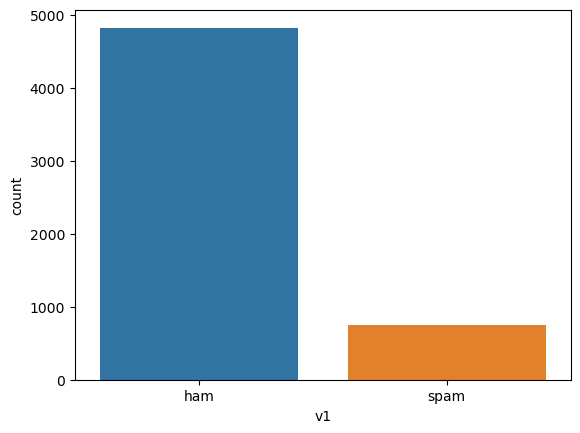

In [11]:
sns.countplot(data=mail_data,x='v1')

In [12]:
mail_data.v1=mail_data.v1.map({'spam':0,'ham':1})

In [13]:
mail_data.head(3)

,v1,v2
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...


In [14]:
mail_data.columns=['Category','Message']
mail_data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
x=mail_data['Message']
y=mail_data[['Category']]

In [16]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [17]:
y

,Category
0,1
1,1
2,0
3,1
4,1
...,...
5567,0
5568,1
5569,1
5570,1


In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [19]:
x_train.shape,y_train.shape

((3900,), (3900, 1))

In [20]:
x_test.shape,y_test.shape

((1672,), (1672, 1))

In [21]:
feature_extract=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
x_train_features=feature_extract.fit_transform(x_train)
x_test_features=feature_extract.transform(x_test)

y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [22]:
print(x_train)

1455    Summers finally here! Fancy a chat or flirt wi...
3460    K.. I yan jiu liao... Sat we can go 4 bugis vi...
2493    they released another Italian one today and it...
3378                      Dear umma she called me now :-)
3826    Congratulations U can claim 2 VIP row A Ticket...
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: Message, Length: 3900, dtype: object


In [23]:
print(x_train_features)

  (0, 3051)	0.29377250073173566
  (0, 5839)	0.1629936193036503
  (0, 6355)	0.1558807617733673
  (0, 4463)	0.25613863155350935
  (0, 3431)	0.21322420382137608
  (0, 2669)	0.1467992773406004
  (0, 5923)	0.25613863155350935
  (0, 5142)	0.16010721180454363
  (0, 3466)	0.12934748264716298
  (0, 3913)	0.29377250073173566
  (0, 933)	0.2508580729996024
  (0, 6905)	0.24224909018184185
  (0, 5555)	0.2623842067100304
  (0, 5433)	0.21163062235443741
  (0, 2593)	0.2623842067100304
  (0, 1554)	0.19988276732642443
  (0, 2478)	0.22711374519304361
  (0, 2549)	0.23239430374695055
  (0, 5924)	0.29377250073173566
  (1, 3072)	0.1865177094597328
  (1, 4136)	0.1722045163692168
  (1, 4468)	0.20883030509262115
  (1, 239)	0.19895682423577737
  (1, 1619)	0.1783242740180506
  (1, 5927)	0.16325005023994915
  :	:
  (3895, 1962)	0.3492375146371
  (3896, 929)	0.6746077916779829
  (3896, 6722)	0.5760607620840338
  (3896, 1630)	0.46158241495372976
  (3897, 4963)	0.4437658514900006
  (3897, 1841)	0.41379848369481503
  (

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model=LogisticRegression()

In [26]:
model.fit(x_train_features,y_train)

LogisticRegression()

In [27]:
y_train_pred=model.predict(x_train_features)
y_train_pred

array([0, 1, 1, ..., 1, 1, 1])

In [28]:
train_accuracy=accuracy_score(y_train,y_train_pred)
print(train_accuracy)

0.9638461538461538


In [29]:
y_test_pred=model.predict(x_test_features)
y_test_pred

array([1, 1, 1, ..., 1, 1, 1])

In [30]:
test_accuracy=accuracy_score(y_test,y_test_pred)
print(test_accuracy)

0.9617224880382775


In [31]:
input_mail=['As per your request Melle Melle (Oru Minnaminunginte Nurungu Vettam) has been set as your callertune for all Callers. Press *9 to copy your friends Callertune']
input_mail_features=feature_extract.transform(input_mail)

print(model.predict(input_mail_features))

[1]
